# Max McKie
# HW 8
# Problem 2

In [1]:
import math
import itertools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from corner import corner

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

## 2A

In [2]:
#creating data
a= np.genfromtxt('HTRU2_reduced.txt', skip_header=1)

mean = list(a.T[:][0])
std = list(a.T[:][1])
kurt = list(a.T[:][2])
skew = list(a.T[:][3])
clss = a.T[:][4]

data = np.array([mean,std,kurt,skew])

In [3]:
validation_size = 0.3
seed = 7

#split up data into model training set and confirmation set
X_train, X_validation, Y_train, Y_validation = \
    model_selection.train_test_split(data.T, clss, 
                                     test_size=validation_size, 
                                     random_state=seed)


Linear Discriminant: 0.974864 (0.007135)
K Nearest Neighbors: 0.977651 (0.008039)
Linear Discriminant
0.9692737430167597
[[961   1]
 [ 32  80]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       962
         1.0       0.99      0.71      0.83       112

    accuracy                           0.97      1074
   macro avg       0.98      0.86      0.91      1074
weighted avg       0.97      0.97      0.97      1074

K Nearest Neighbors
0.9618249534450651
[[959   3]
 [ 38  74]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       962
         1.0       0.96      0.66      0.78       112

    accuracy                           0.96      1074
   macro avg       0.96      0.83      0.88      1074
weighted avg       0.96      0.96      0.96      1074



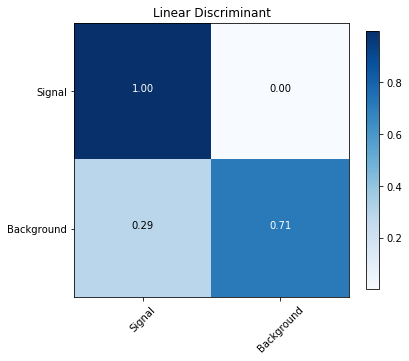

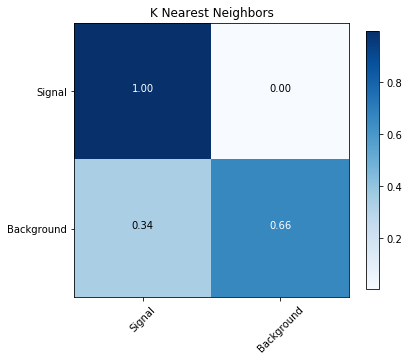

In [4]:
#Straight from Iris example on Github

scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('Linear Discriminant', LinearDiscriminantAnalysis()))
models.append(('K Nearest Neighbors', KNeighborsClassifier()))

# evaluate each model in turn.
# Preprocess the training data first. See
# https://scikit-learn.org/stable/modules/preprocessing.html
X_scaled = preprocessing.scale(X_train)

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_scaled, Y_train,
                                                 cv=kfold, 
                                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
normalize = True
names = ['Signal','Background']
# Make predictions on validation dataset.
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    cm = confusion_matrix(Y_validation, predictions)
    
    print(name)
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(1,1, figsize=(6,6))
    img = ax.imshow(cm,
                    interpolation='nearest',
                    cmap='Blues')

    tick_marks = np.arange(len(names))
    tick_names = [x for x in names]
    ax.set(#aspect='equal',
           xticks=tick_marks,
           xticklabels=tick_names,
           yticks=tick_marks,
           yticklabels=tick_names,
           title=name)
    fig.colorbar(img, shrink=0.675)
    plt.xticks(rotation=45)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()

In [5]:
modelA = KNeighborsClassifier()
modelB = LinearDiscriminantAnalysis()

#fitting models to training data with each classifier
modelA.fit(X_train,Y_train)
modelB.fit(X_train,Y_train)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

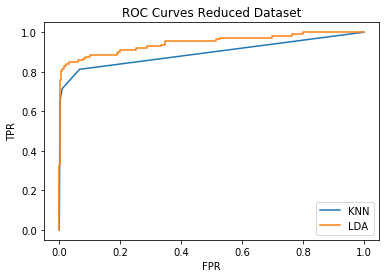

In [6]:
#getting/plotting ROC curves for each model
probA = modelA.predict_proba(X_validation)[:,1]
fprA,tprA, threshA = roc_curve(Y_validation,probA)

probB = modelB.predict_proba(X_validation)[:,1]
fprB,tprB, threshB = roc_curve(Y_validation,probB)

plt.plot(fprA,tprA,label='KNN')
plt.plot(fprB,tprB,label='LDA')
plt.title('ROC Curves Reduced Dataset')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()
plt.show()

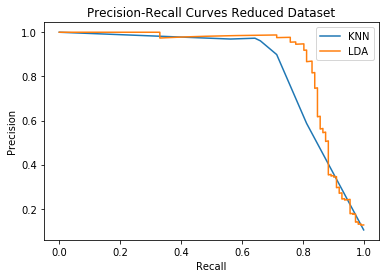

In [7]:
#Precision Recall Curves for each model
prA,recA,thrA = precision_recall_curve(Y_validation,probA)
prB,recB,thrB = precision_recall_curve(Y_validation,probB)

plt.plot(recA,prA,label='KNN')
plt.plot(recB,prB,label='LDA')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves Reduced Dataset')
plt.legend()
plt.show()

#### NOTE: Below are the Precision Recall Curves for the same 2 models, but using the plot_precision_recall_curve function rather than plotting the output of the precision_recall_curve function as I did above.

#### Both methods take the same input data,  and while the LDA curve is unaffected the KNN curve changes considerably depending on the method. I don't know how to explain this, but I thought I'd include it. 

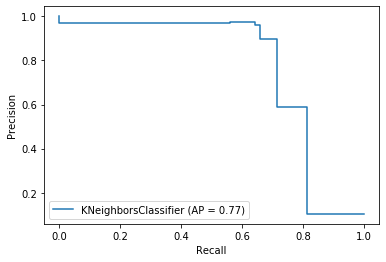

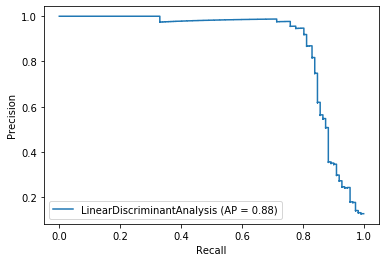

In [8]:
plot_precision_recall_curve(modelA, X_validation, Y_validation)
plot_precision_recall_curve(modelB, X_validation, Y_validation)
plt.show()

## 2B

In [9]:
#Everything from here on is exact same format as above, just using more data

b= np.genfromtxt('HTRU2.txt', skip_header=1)

mean2 = list(b.T[:][0])
std2 = list(b.T[:][1])
kurt2 = list(b.T[:][2])
skew2 = list(b.T[:][3])
SNRmean = list(b.T[:][4])
SNRstd = list(b.T[:][5])
SNRkurt = list(b.T[:][6])
SNRskew = list(b.T[:][7])
clss2 = b.T[:][8]

data2 = np.array([mean2,std2,kurt2,skew2])
dataAll = np.array([mean2,std2,kurt2,skew2,SNRmean,SNRstd,SNRkurt,SNRskew])

Linear Discriminant: 0.973178 (0.004040)
K Nearest Neighbors: 0.977488 (0.004736)
Linear Discriminant
0.97243947858473
[[4865   14]
 [ 134  357]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      4879
         1.0       0.96      0.73      0.83       491

    accuracy                           0.97      5370
   macro avg       0.97      0.86      0.91      5370
weighted avg       0.97      0.97      0.97      5370

K Nearest Neighbors
0.9752327746741155
[[4849   30]
 [ 103  388]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      4879
         1.0       0.93      0.79      0.85       491

    accuracy                           0.98      5370
   macro avg       0.95      0.89      0.92      5370
weighted avg       0.97      0.98      0.97      5370



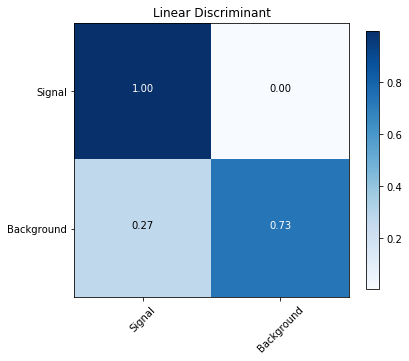

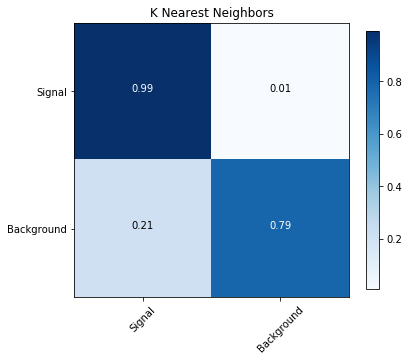

In [10]:
X_train, X_validation, Y_train, Y_validation = \
    model_selection.train_test_split(data2.T, clss2, 
                                     test_size=validation_size, 
                                     random_state=seed)
X_scaled = preprocessing.scale(X_train)

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_scaled, Y_train,
                                                 cv=kfold, 
                                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

normalize = True
names = ['Signal','Background']
# Make predictions on validation dataset.
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    cm = confusion_matrix(Y_validation, predictions)
    
    print(name)
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(1,1, figsize=(6,6))
    img = ax.imshow(cm,
                    interpolation='nearest',
                    cmap='Blues')

    tick_marks = np.arange(len(names))
    tick_names = [x for x in names]
    ax.set(#aspect='equal',
           xticks=tick_marks,
           xticklabels=tick_names,
           yticks=tick_marks,
           yticklabels=tick_names,
           title=name)
    fig.colorbar(img, shrink=0.675)
    plt.xticks(rotation=45)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()

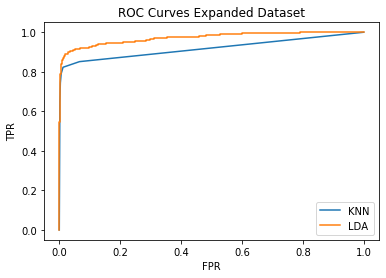

In [11]:
modelA = KNeighborsClassifier()
modelB = LinearDiscriminantAnalysis()

modelA.fit(X_train,Y_train)
modelB.fit(X_train,Y_train)

probA = modelA.predict_proba(X_validation)[:,1]
fprA,tprA, threshA = roc_curve(Y_validation,probA)
probB = modelB.predict_proba(X_validation)[:,1]
fprB,tprB, threshB = roc_curve(Y_validation,probB)


plt.plot(fprA,tprA, label='KNN')
plt.plot(fprB,tprB,label='LDA')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curves Expanded Dataset')
plt.legend()
plt.show()

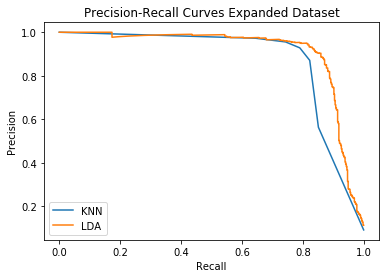

In [12]:
prA,recA,thrA = precision_recall_curve(Y_validation,probA)
prB,recB,thrB = precision_recall_curve(Y_validation,probB)
plt.plot(recA,prA,label='KNN')
plt.plot(recB,prB,label='LDA')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves Expanded Dataset')
plt.legend()
plt.show()

#### Both the ROC curves and Precision Recall curves improved after providing more data to the model (being pulled towards (0,1) and (1,1), respectively). This makes sense because since the model has more data to better learn the features of signal vs background, it should have an improved true positive rate (TPR), precision, and recall, and a lower false positive rate.

#### The bigger dataset has the added advantage of smoothing out the curves, which makes it easier in practice to choose a suitable threshold.

## 2C

Linear Discriminant: 0.974774 (0.002770)
K Nearest Neighbors: 0.978207 (0.002926)
Linear Discriminant
0.9746741154562384
[[4858   21]
 [ 115  376]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      4879
         1.0       0.95      0.77      0.85       491

    accuracy                           0.97      5370
   macro avg       0.96      0.88      0.92      5370
weighted avg       0.97      0.97      0.97      5370

K Nearest Neighbors
0.9711359404096834
[[4830   49]
 [ 106  385]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      4879
         1.0       0.89      0.78      0.83       491

    accuracy                           0.97      5370
   macro avg       0.93      0.89      0.91      5370
weighted avg       0.97      0.97      0.97      5370



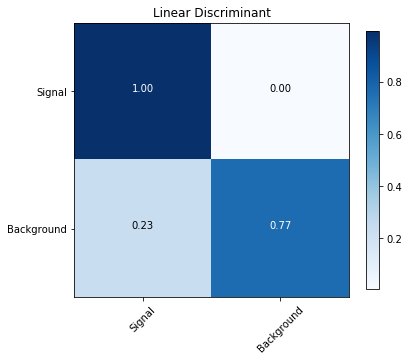

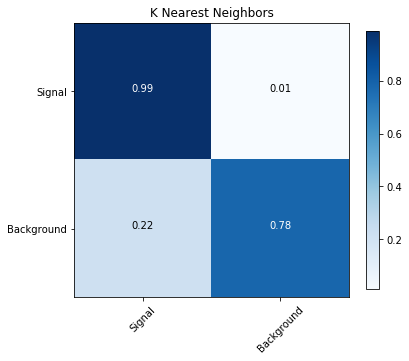

In [13]:
X_train, X_validation, Y_train, Y_validation = \
    model_selection.train_test_split(dataAll.T, clss2, 
                                     test_size=validation_size, 
                                     random_state=seed)
X_scaled = preprocessing.scale(X_train)

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_scaled, Y_train,
                                                 cv=kfold, 
                                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

normalize = True
names = ['Signal','Background']
# Make predictions on validation dataset.
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    cm = confusion_matrix(Y_validation, predictions)
    
    print(name)
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(1,1, figsize=(6,6))
    img = ax.imshow(cm,
                    interpolation='nearest',
                    cmap='Blues')

    tick_marks = np.arange(len(names))
    tick_names = [x for x in names]
    ax.set(#aspect='equal',
           xticks=tick_marks,
           xticklabels=tick_names,
           yticks=tick_marks,
           yticklabels=tick_names,
           title=name)
    fig.colorbar(img, shrink=0.675)
    plt.xticks(rotation=45)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()

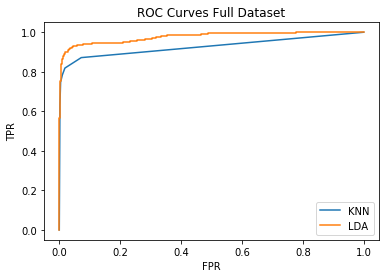

In [14]:
modelA = KNeighborsClassifier()
modelB = LinearDiscriminantAnalysis()

modelA.fit(X_train,Y_train)
modelB.fit(X_train,Y_train)

probA = modelA.predict_proba(X_validation)[:,1]
fprA,tprA, threshA = roc_curve(Y_validation,probA)
probB = modelB.predict_proba(X_validation)[:,1]
fprB,tprB, threshB = roc_curve(Y_validation,probB)

plt.plot(fprA,tprA, label='KNN')
plt.plot(fprB,tprB,label='LDA')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curves Full Dataset')
plt.legend()
plt.show()

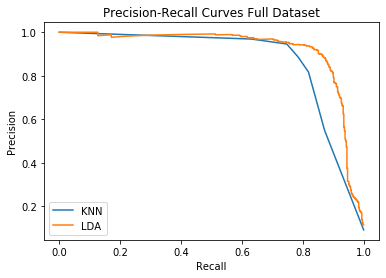

In [15]:
prA,recA,thrA = precision_recall_curve(Y_validation,probA)
prB,recB,thrB = precision_recall_curve(Y_validation,probB)

plt.plot(recA,prA,label='KNN')
plt.plot(recB,prB,label='LDA')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves Full Dataset')
plt.legend()
plt.show()

#### The additional four features had little to no effect on the performance of the fits. This suggests that the performance of the classifiers depends only (or mainly) on the quantity of data points rather than the quantity of different features